## Objective

Comparative study of KNN and Decision tree for predicting Students Adaptability level in Online Education.

### Import libraries

In [1]:

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from ydata_profiling import ProfileReport
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import OrdinalEncoder



C:\Users\hp\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
%matplotlib inline

### Read Data

In [3]:
df = pd.read_csv("D:/AtomCamp/Machine_Learning/Assignment/students_adaptability_level_online_education.csv")

In [4]:
df.head()

Gender    Age Education Level Institution Type IT Student Location  \
0    Boy  21-25      University   Non Government         No      Yes   
1   Girl  21-25      University   Non Government         No      Yes   
2   Girl  16-20         College       Government         No      Yes   
3   Girl  11-15          School   Non Government         No      Yes   
4   Girl  16-20          School   Non Government         No      Yes   

  Load-shedding Financial Condition Internet Type Network Type Class Duration  \
0           Low                 Mid          Wifi           4G            3-6   
1          High                 Mid   Mobile Data           4G            1-3   
2           Low                 Mid          Wifi           4G            1-3   
3           Low                 Mid   Mobile Data           4G            1-3   
4           Low                Poor   Mobile Data           3G              0   

  Self Lms  Device Adaptivity Level  
0       No     Tab         Moderate  
1      Yes  Mobile         Moderate  
2       No  Mobile         Moderate  
3       No  Mobile         Moderate  
4       No  Mobile              Low

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1205 non-null   object
 1   Age                  1205 non-null   object
 2   Education Level      1205 non-null   object
 3   Institution Type     1205 non-null   object
 4   IT Student           1205 non-null   object
 5   Location             1205 non-null   object
 6   Load-shedding        1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Class Duration       1205 non-null   object
 11  Self Lms             1205 non-null   object
 12  Device               1205 non-null   object
 13  Adaptivity Level     1205 non-null   object
dtypes: object(14)
memory usage: 131.9+ KB


In [6]:
df.duplicated().sum()

949

In [7]:
df.shape

(1205, 14)

In [8]:
df.iloc[0]

Gender                            Boy
Age                             21-25
Education Level            University
Institution Type       Non Government
IT Student                         No
Location                          Yes
Load-shedding                     Low
Financial Condition               Mid
Internet Type                    Wifi
Network Type                       4G
Class Duration                    3-6
Self Lms                           No
Device                            Tab
Adaptivity Level             Moderate
Name: 0, dtype: object

### Generate Data Profiling Report

In [9]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df)

profile


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**Encoded DataFrame Profile**

In [21]:
profile_encoded = ProfileReport(df_encoded)

profile_encoded


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Encoding

Choose a suitable encoding technique for the columns.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1205 non-null   object
 1   Age                  1205 non-null   object
 2   Education Level      1205 non-null   object
 3   Institution Type     1205 non-null   object
 4   IT Student           1205 non-null   object
 5   Location             1205 non-null   object
 6   Load-shedding        1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Class Duration       1205 non-null   object
 11  Self Lms             1205 non-null   object
 12  Device               1205 non-null   object
 13  Adaptivity Level     1205 non-null   object
dtypes: object(14)
memory usage: 131.9+ KB


**OneHot Encoding**

import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder


In [12]:

# Assuming the dataset is stored in a DataFrame called 'data'

# One-hot encoding for nominal categorical columns without inherent order
nominal_cols = ['Location','IT Student','Gender', 'Institution Type', 'Load-shedding', 'Internet Type', 'Network Type', 'Device', 'Self Lms']
df_encoded = pd.get_dummies(df, columns=nominal_cols, dtype=int)


In [13]:
df_encoded.head()

Age Education Level Financial Condition Class Duration Adaptivity Level  \
0  21-25      University                 Mid            3-6         Moderate   
1  21-25      University                 Mid            1-3         Moderate   
2  16-20         College                 Mid            1-3         Moderate   
3  11-15          School                 Mid            1-3         Moderate   
4  16-20          School                Poor              0              Low   

   Location_No  Location_Yes  IT Student_No  IT Student_Yes  Gender_Boy  ...  \
0            0             1              1               0           1  ...   
1            0             1              1               0           0  ...   
2            0             1              1               0           0  ...   
3            0             1              1               0           0  ...   
4            0             1              1               0           0  ...   

   Internet Type_Mobile Data  Internet Type_Wifi  Network Type_2G  \
0                          0                   1                0   
1                          1                   0                0   
2                          0                   1                0   
3                          1                   0                0   
4                          1                   0                0   

   Network Type_3G  Network Type_4G  Device_Computer  Device_Mobile  \
0                0                1                0              0   
1                0                1                0              1   
2                0                1                0              1   
3                0                1                0              1   
4                1                0                0              1   

   Device_Tab  Self Lms_No  Self Lms_Yes  
0           1            1             0  
1           0            0             1  
2           0            1             0  
3           0            1             0  
4           0            1             0  

[5 rows x 25 columns]

**Label encoding**

In [15]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [16]:
# Label encoding for ordinal categorical columns with a clear order

label_encoder = LabelEncoder()
ordinal_cols = {
    'Age': ['1-5', '6-10', '11-15', '16-20', '21-25', '26-30'], 
    'Financial Condition': ['Poor', 'Mid', 'Rich'], 
    'Class Duration': ['0', '1-3', '3-6'],
    'Education Level': ['School', 'College', 'University']
}

In [17]:
for col, categories in ordinal_cols.items():
    df_encoded[col] = label_encoder.fit_transform(df[col])

In [18]:
# Label encoding for Target Column

# Encoding the target variable using label encoding
target_encoder = LabelEncoder()
df_encoded['Adaptivity Level'] = target_encoder.fit_transform(df['Adaptivity Level'])


In [19]:
# Display the encoded DataFrame
df_encoded.head()

Age  Education Level  Financial Condition  Class Duration  \
0    3                2                    0               2   
1    3                2                    0               1   
2    2                0                    0               1   
3    1                1                    0               1   
4    2                1                    1               0   

   Adaptivity Level  Location_No  Location_Yes  IT Student_No  IT Student_Yes  \
0                 2            0             1              1               0   
1                 2            0             1              1               0   
2                 2            0             1              1               0   
3                 2            0             1              1               0   
4                 1            0             1              1               0   

   Gender_Boy  ...  Internet Type_Mobile Data  Internet Type_Wifi  \
0           1  ...                          0                   1   
1           0  ...                          1                   0   
2           0  ...                          0                   1   
3           0  ...                          1                   0   
4           0  ...                          1                   0   

   Network Type_2G  Network Type_3G  Network Type_4G  Device_Computer  \
0                0                0                1                0   
1                0                0                1                0   
2                0                0                1                0   
3                0                0                1                0   
4                0                1                0                0   

   Device_Mobile  Device_Tab  Self Lms_No  Self Lms_Yes  
0              0           1            1             0  
1              1           0            0             1  
2              1           0            1             0  
3              1           0            1             0  
4              1           0            1             0  

[5 rows x 25 columns]

In [20]:
df_encoded.dtypes

Age                                int32
Education Level                    int32
Financial Condition                int32
Class Duration                     int32
Adaptivity Level                   int32
Location_No                        int32
Location_Yes                       int32
IT Student_No                      int32
IT Student_Yes                     int32
Gender_Boy                         int32
Gender_Girl                        int32
Institution Type_Government        int32
Institution Type_Non Government    int32
Load-shedding_High                 int32
Load-shedding_Low                  int32
Internet Type_Mobile Data          int32
Internet Type_Wifi                 int32
Network Type_2G                    int32
Network Type_3G                    int32
Network Type_4G                    int32
Device_Computer                    int32
Device_Mobile                      int32
Device_Tab                         int32
Self Lms_No                        int32
Self Lms_Yes    

## Check distribution

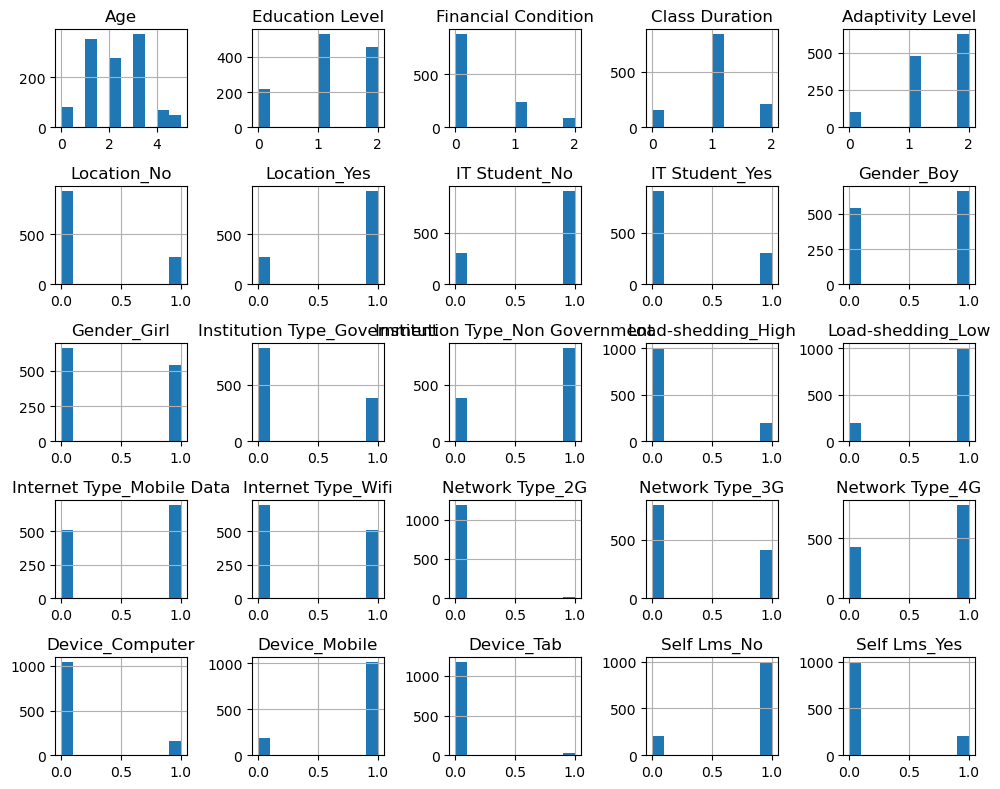

In [22]:
# Plot histograms for each numerical column

df_encoded.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()


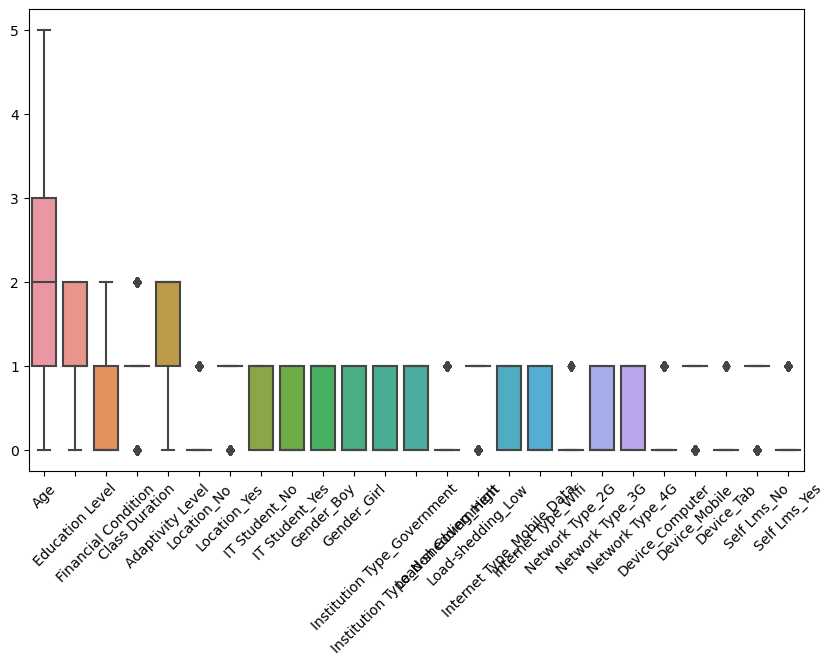

In [23]:
# Plot box plots for each numerical column

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_encoded)
plt.xticks(rotation=45)
plt.show()


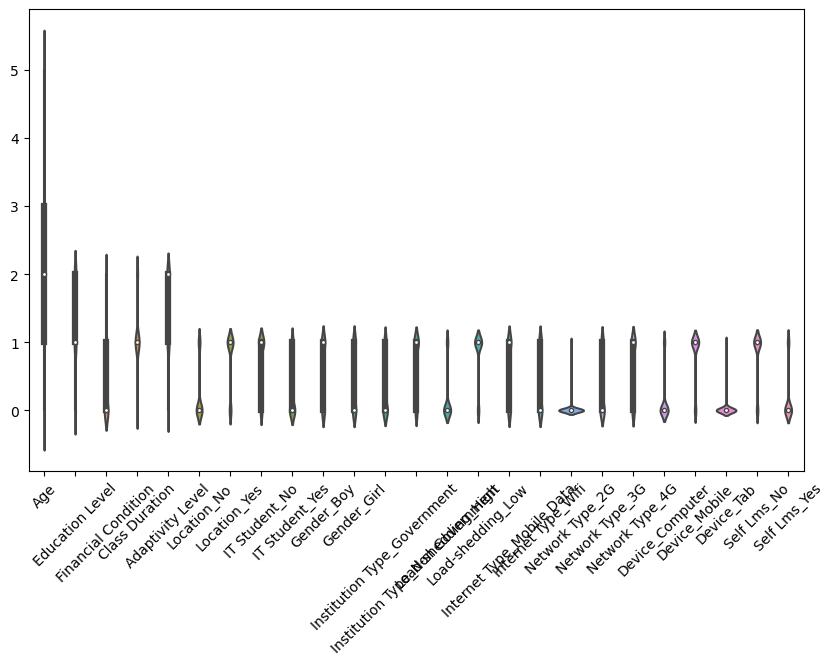

In [24]:
# Plot violin plots for each numerical column

plt.figure(figsize=(10, 6))
sns.violinplot(data=df_encoded)
plt.xticks(rotation=45)
plt.show()

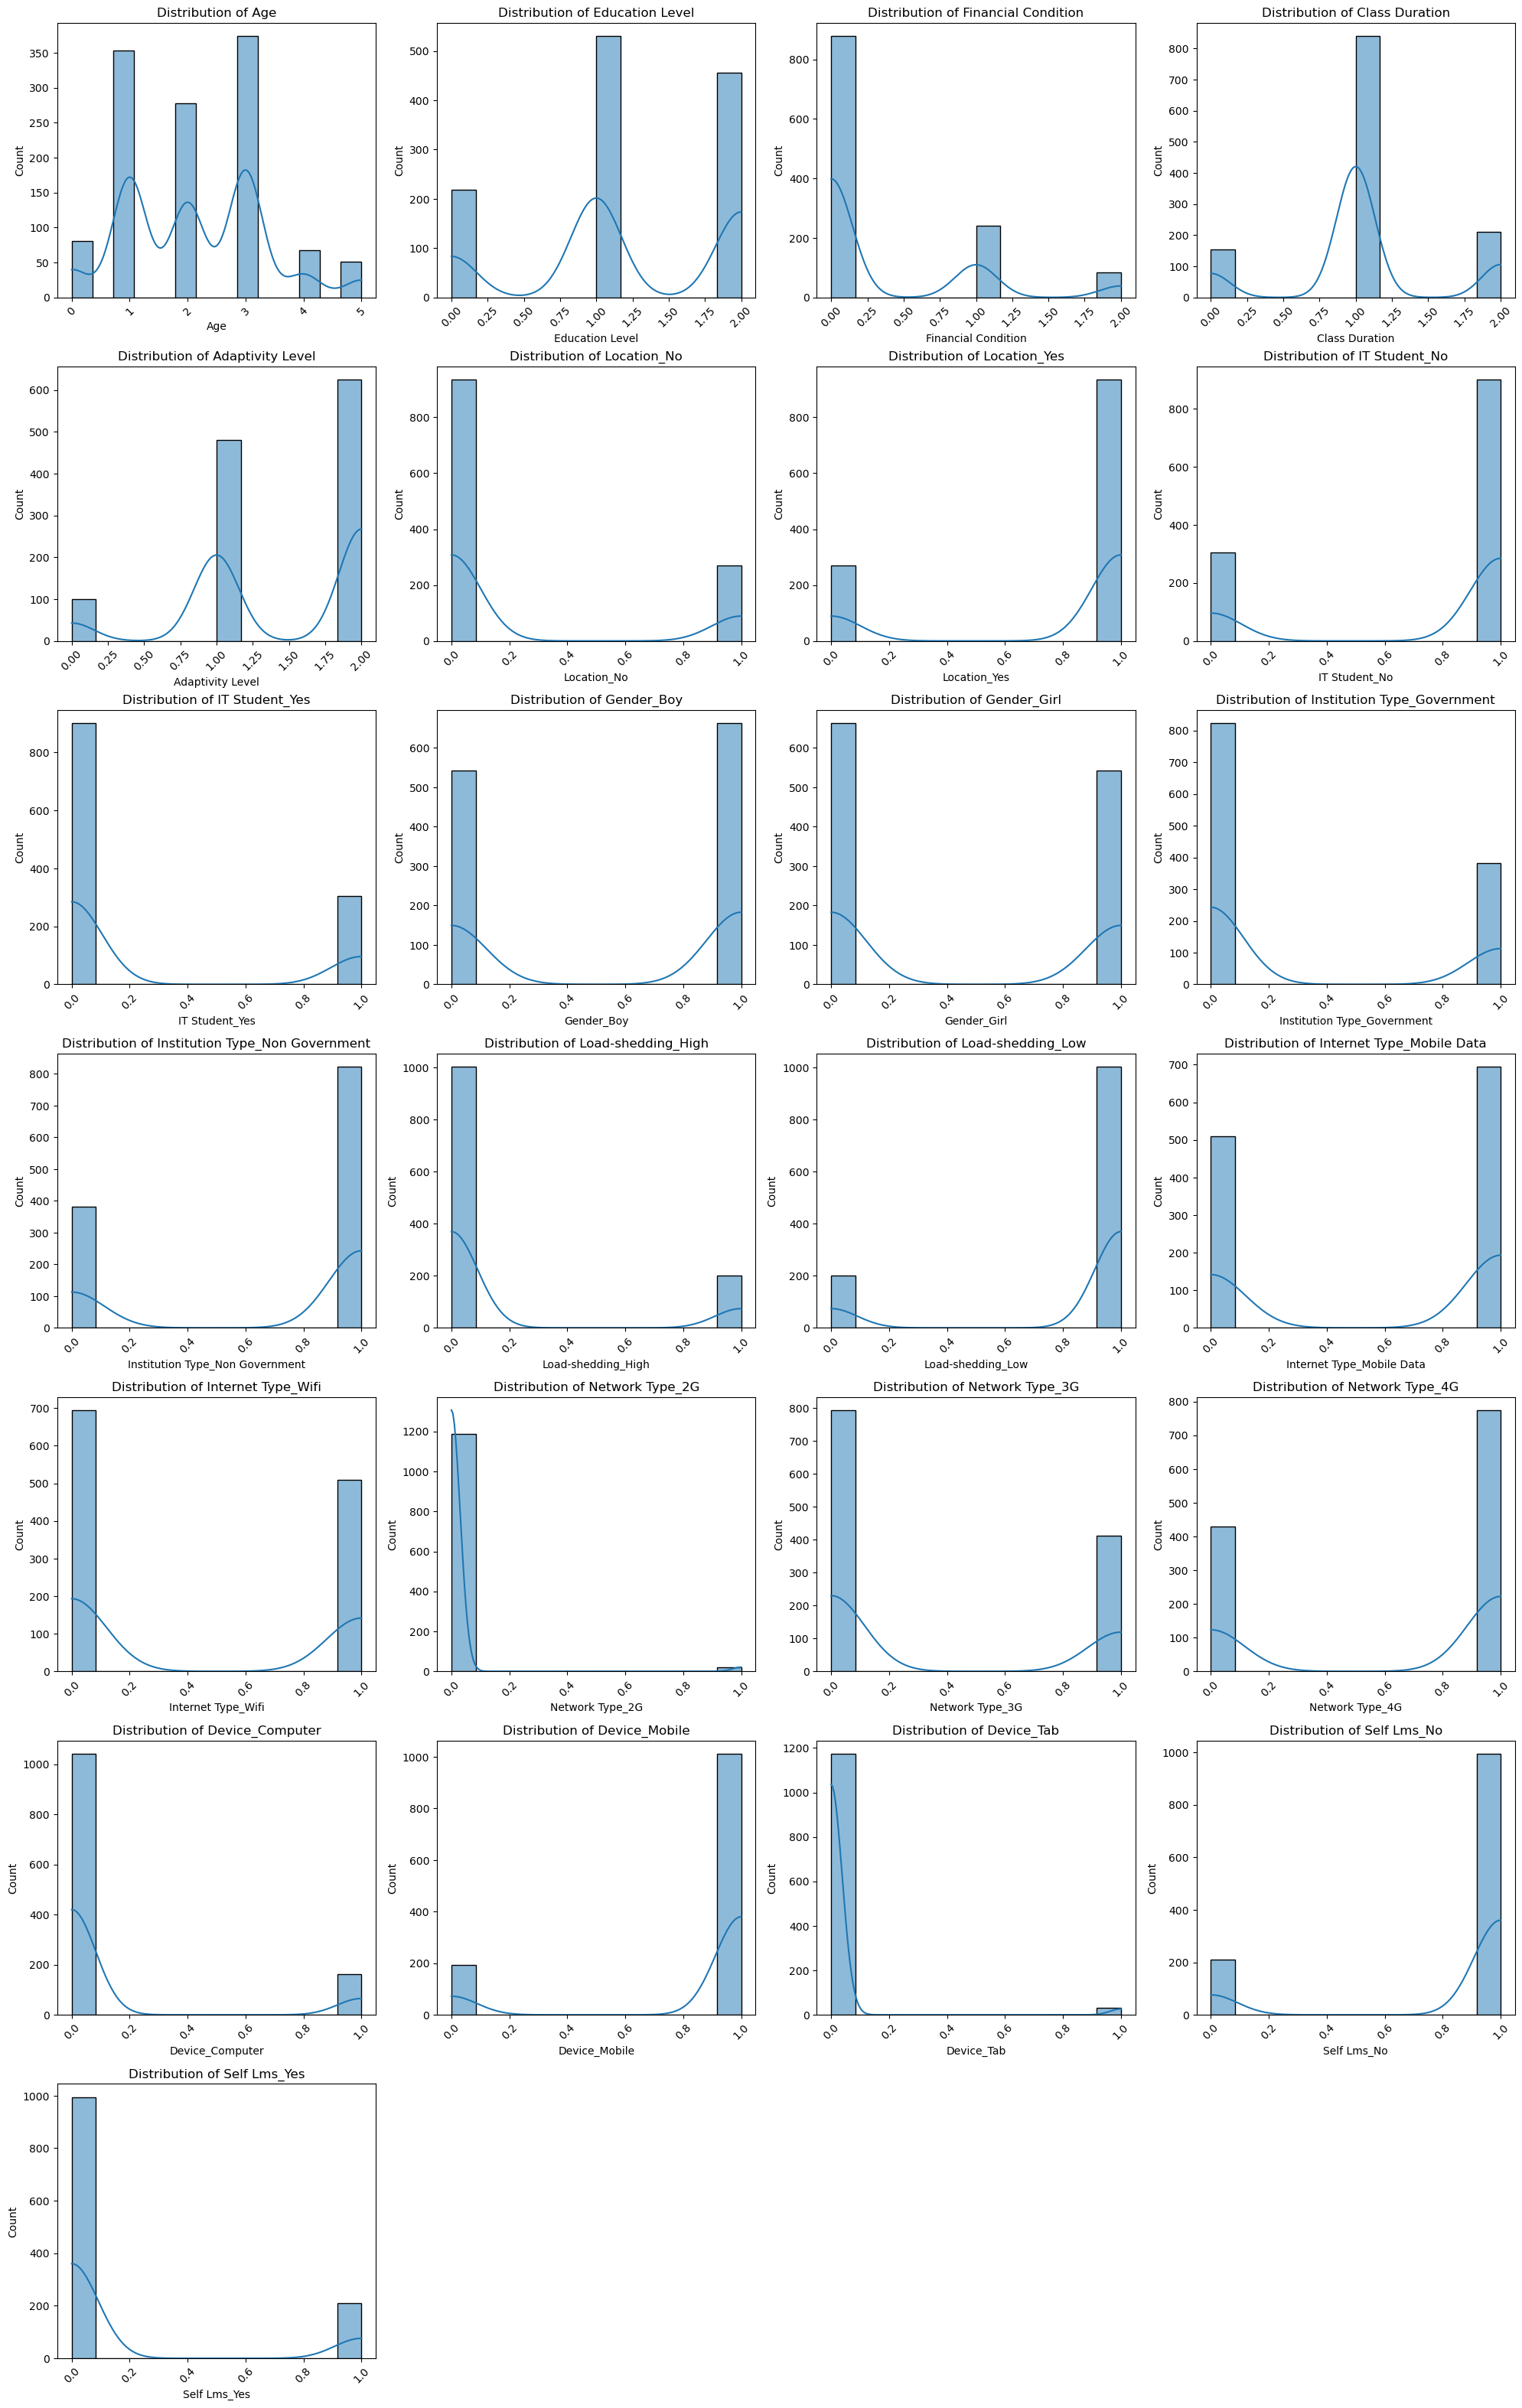

In [25]:
numerical_columns = df_encoded.select_dtypes(include=np.number).columns

plt.figure(figsize=(20, 40))

# Iterate through each channel and plot on a separate subplot
for i, column in enumerate(numerical_columns):
    plt.subplot(9, 4, i+1)
    sns.histplot(df_encoded[column], kde=True)    
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    
# Adjust layout and show the plot
plt.tight_layout()
plt.show()


### Normalized Distribution (Gaussian)

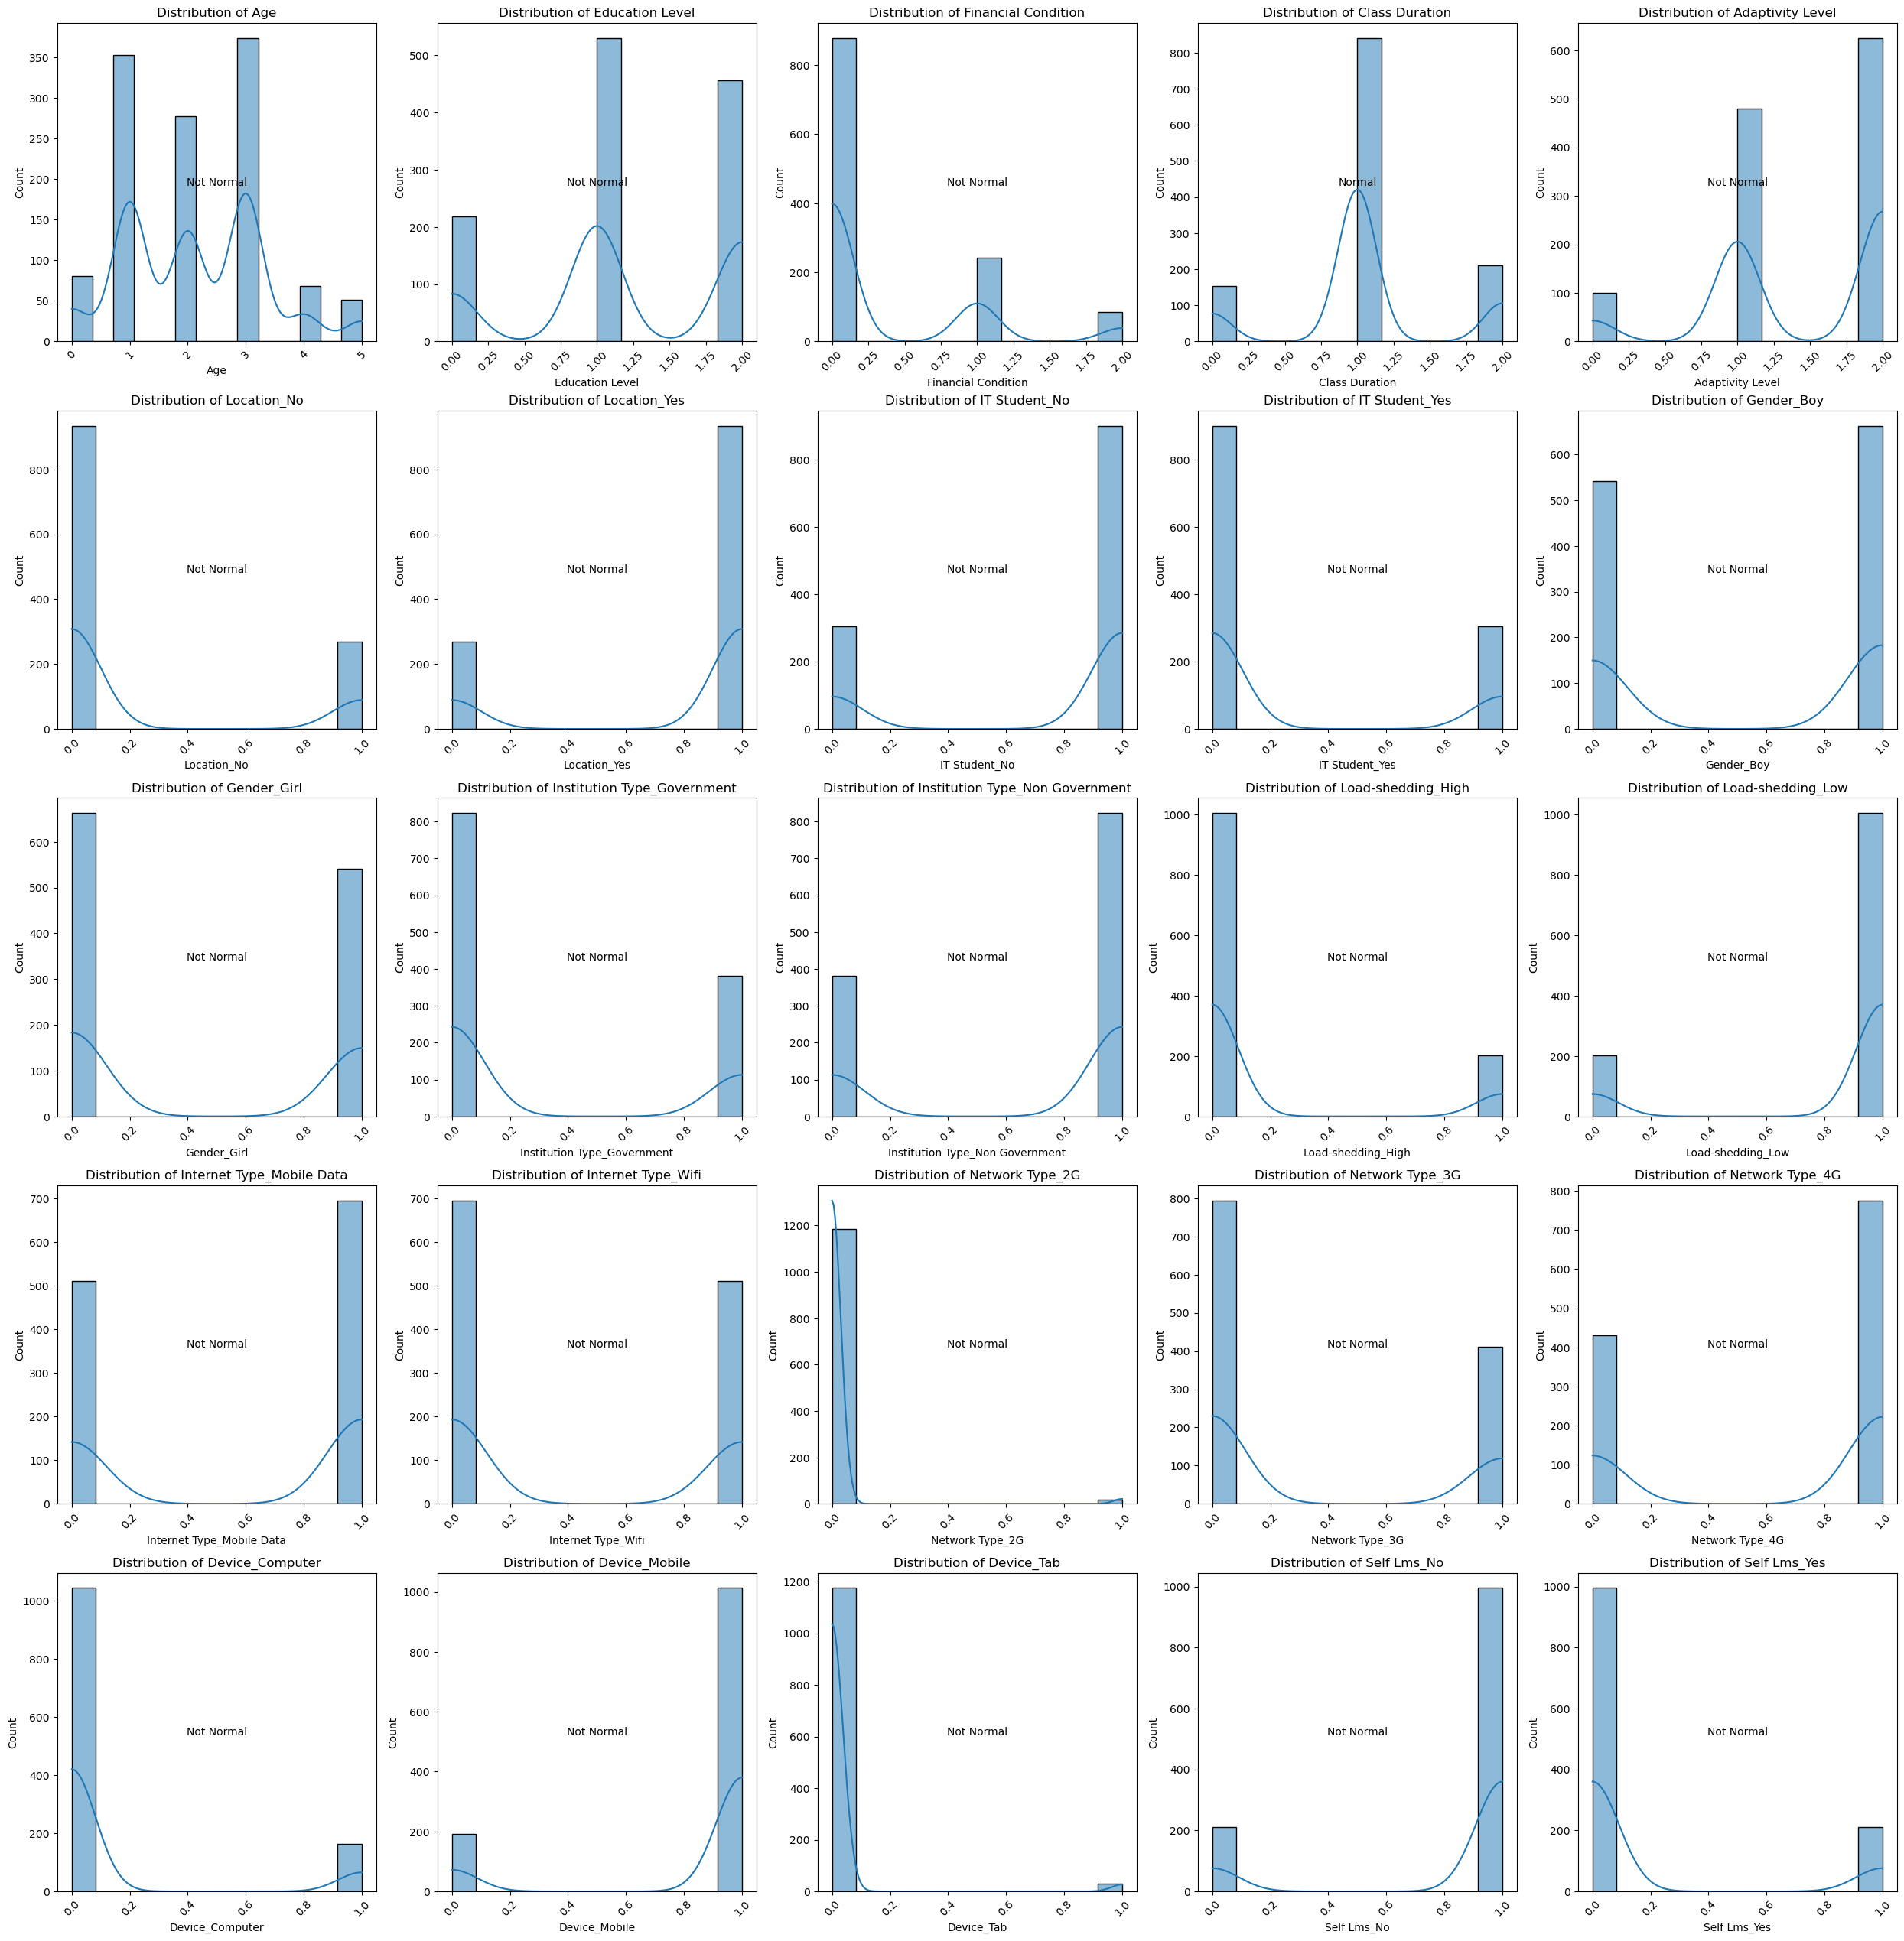

In [26]:
plt.figure(figsize=(25, 30))

# Iterate through each column and plot on a separate subplot
for i, column in enumerate(df_encoded.columns):
    plt.subplot(6, 5, i+1)
    sns.histplot(df_encoded[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    
    # Add additional analysis to detect distribution type
    # Check for normal distribution
    k2, p = stats.normaltest(df_encoded[column])
    # null hyposthesis => The sample is from Normal dsitribution
    if (p < 0.05) | (np.isnan(p)):
        plt.text(0.5, 0.5, "Not Normal", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
    else:
        plt.text(0.5, 0.5, "Normal", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
    
# Adjust layout and show the plot
plt.tight_layout()
plt.show()

### Skewed Distribution (negative and positive)

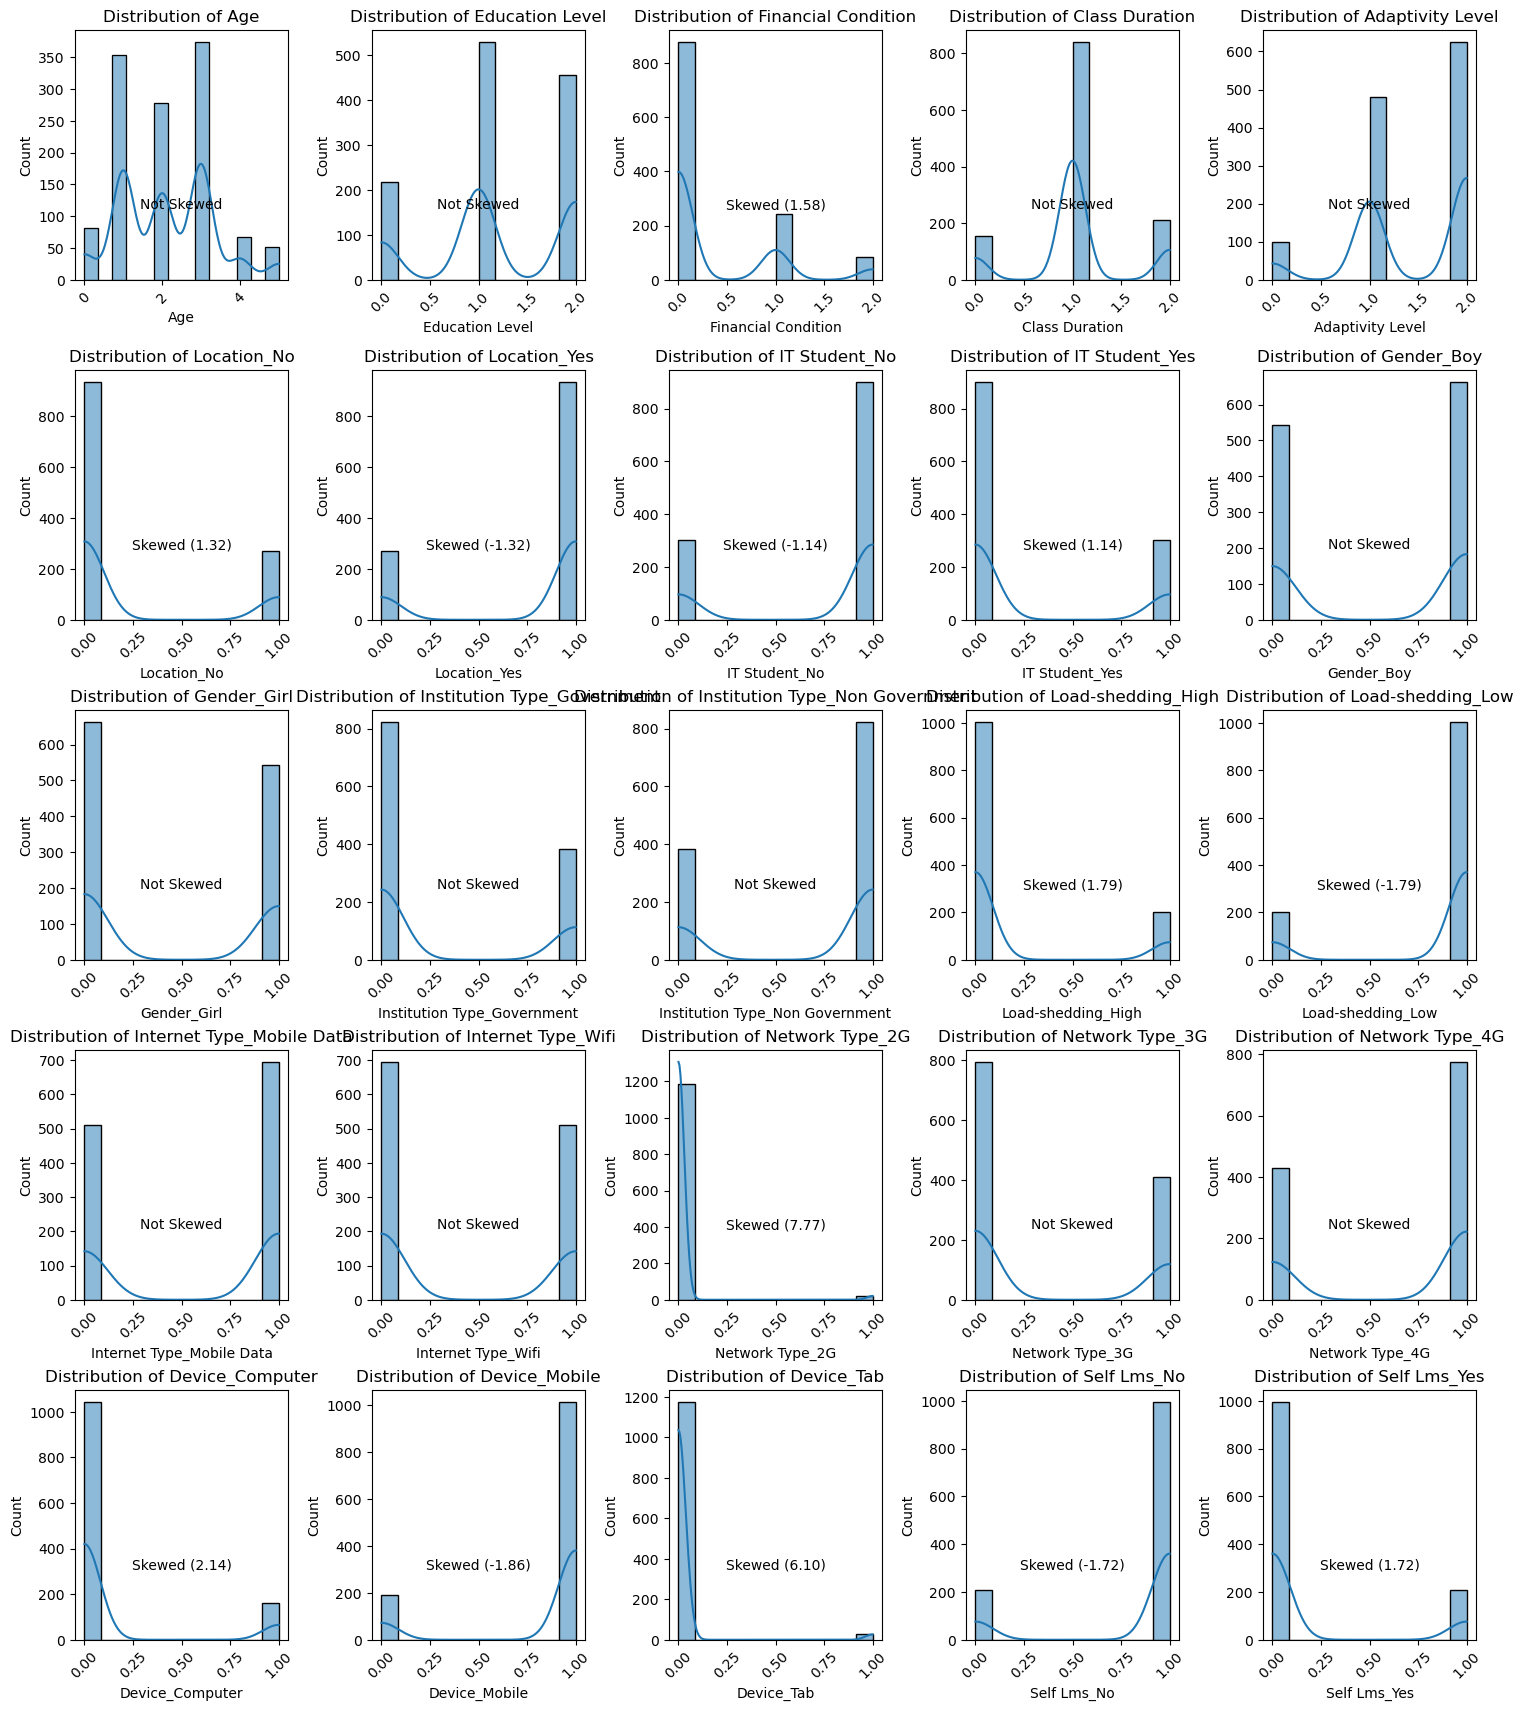

In [27]:
plt.figure(figsize=(15, 20))

# Iterate through each column and plot on a separate subplot
for i, column in enumerate(df_encoded.columns):
    plt.subplot(6, 5, i+1)
    sns.histplot(df_encoded[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    
    # Check for skewness
    skewness = stats.skew(df_encoded[column])
    if skewness < -1 or skewness > 1:
        plt.text(0.5, 0.3, f"Skewed ({skewness:.2f})", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
    else:
        plt.text(0.5, 0.3, f"Not Skewed", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

## Outlier Detection

In [28]:
# Function to detect outliers using Z-score for a specific column
def detect_outliers_z_score(data, threshold=3):
    z_scores = (data - data.mean()) / data.std()
    outliers = (np.abs(z_scores) > threshold).any(axis=1)
    return outliers

In [29]:
# Detect outliers for each numeric column
outliers = detect_outliers_z_score(df_encoded[df_encoded.columns])

# Print indices of rows containing outliers
outlier_indices = df_encoded.index[outliers].tolist()
print("Index of rows with outliers:", outlier_indices)
print("Count of outliers:", len(outlier_indices))


Index of rows with outliers: [0, 75, 97, 108, 149, 189, 210, 238, 274, 277, 296, 306, 308, 316, 412, 437, 505, 511, 514, 525, 557, 582, 585, 602, 740, 754, 772, 808, 823, 846, 871, 880, 934, 935, 936, 959, 961, 978, 1012, 1020, 1041, 1046, 1056, 1079, 1123, 1145, 1158]
Count of outliers: 47


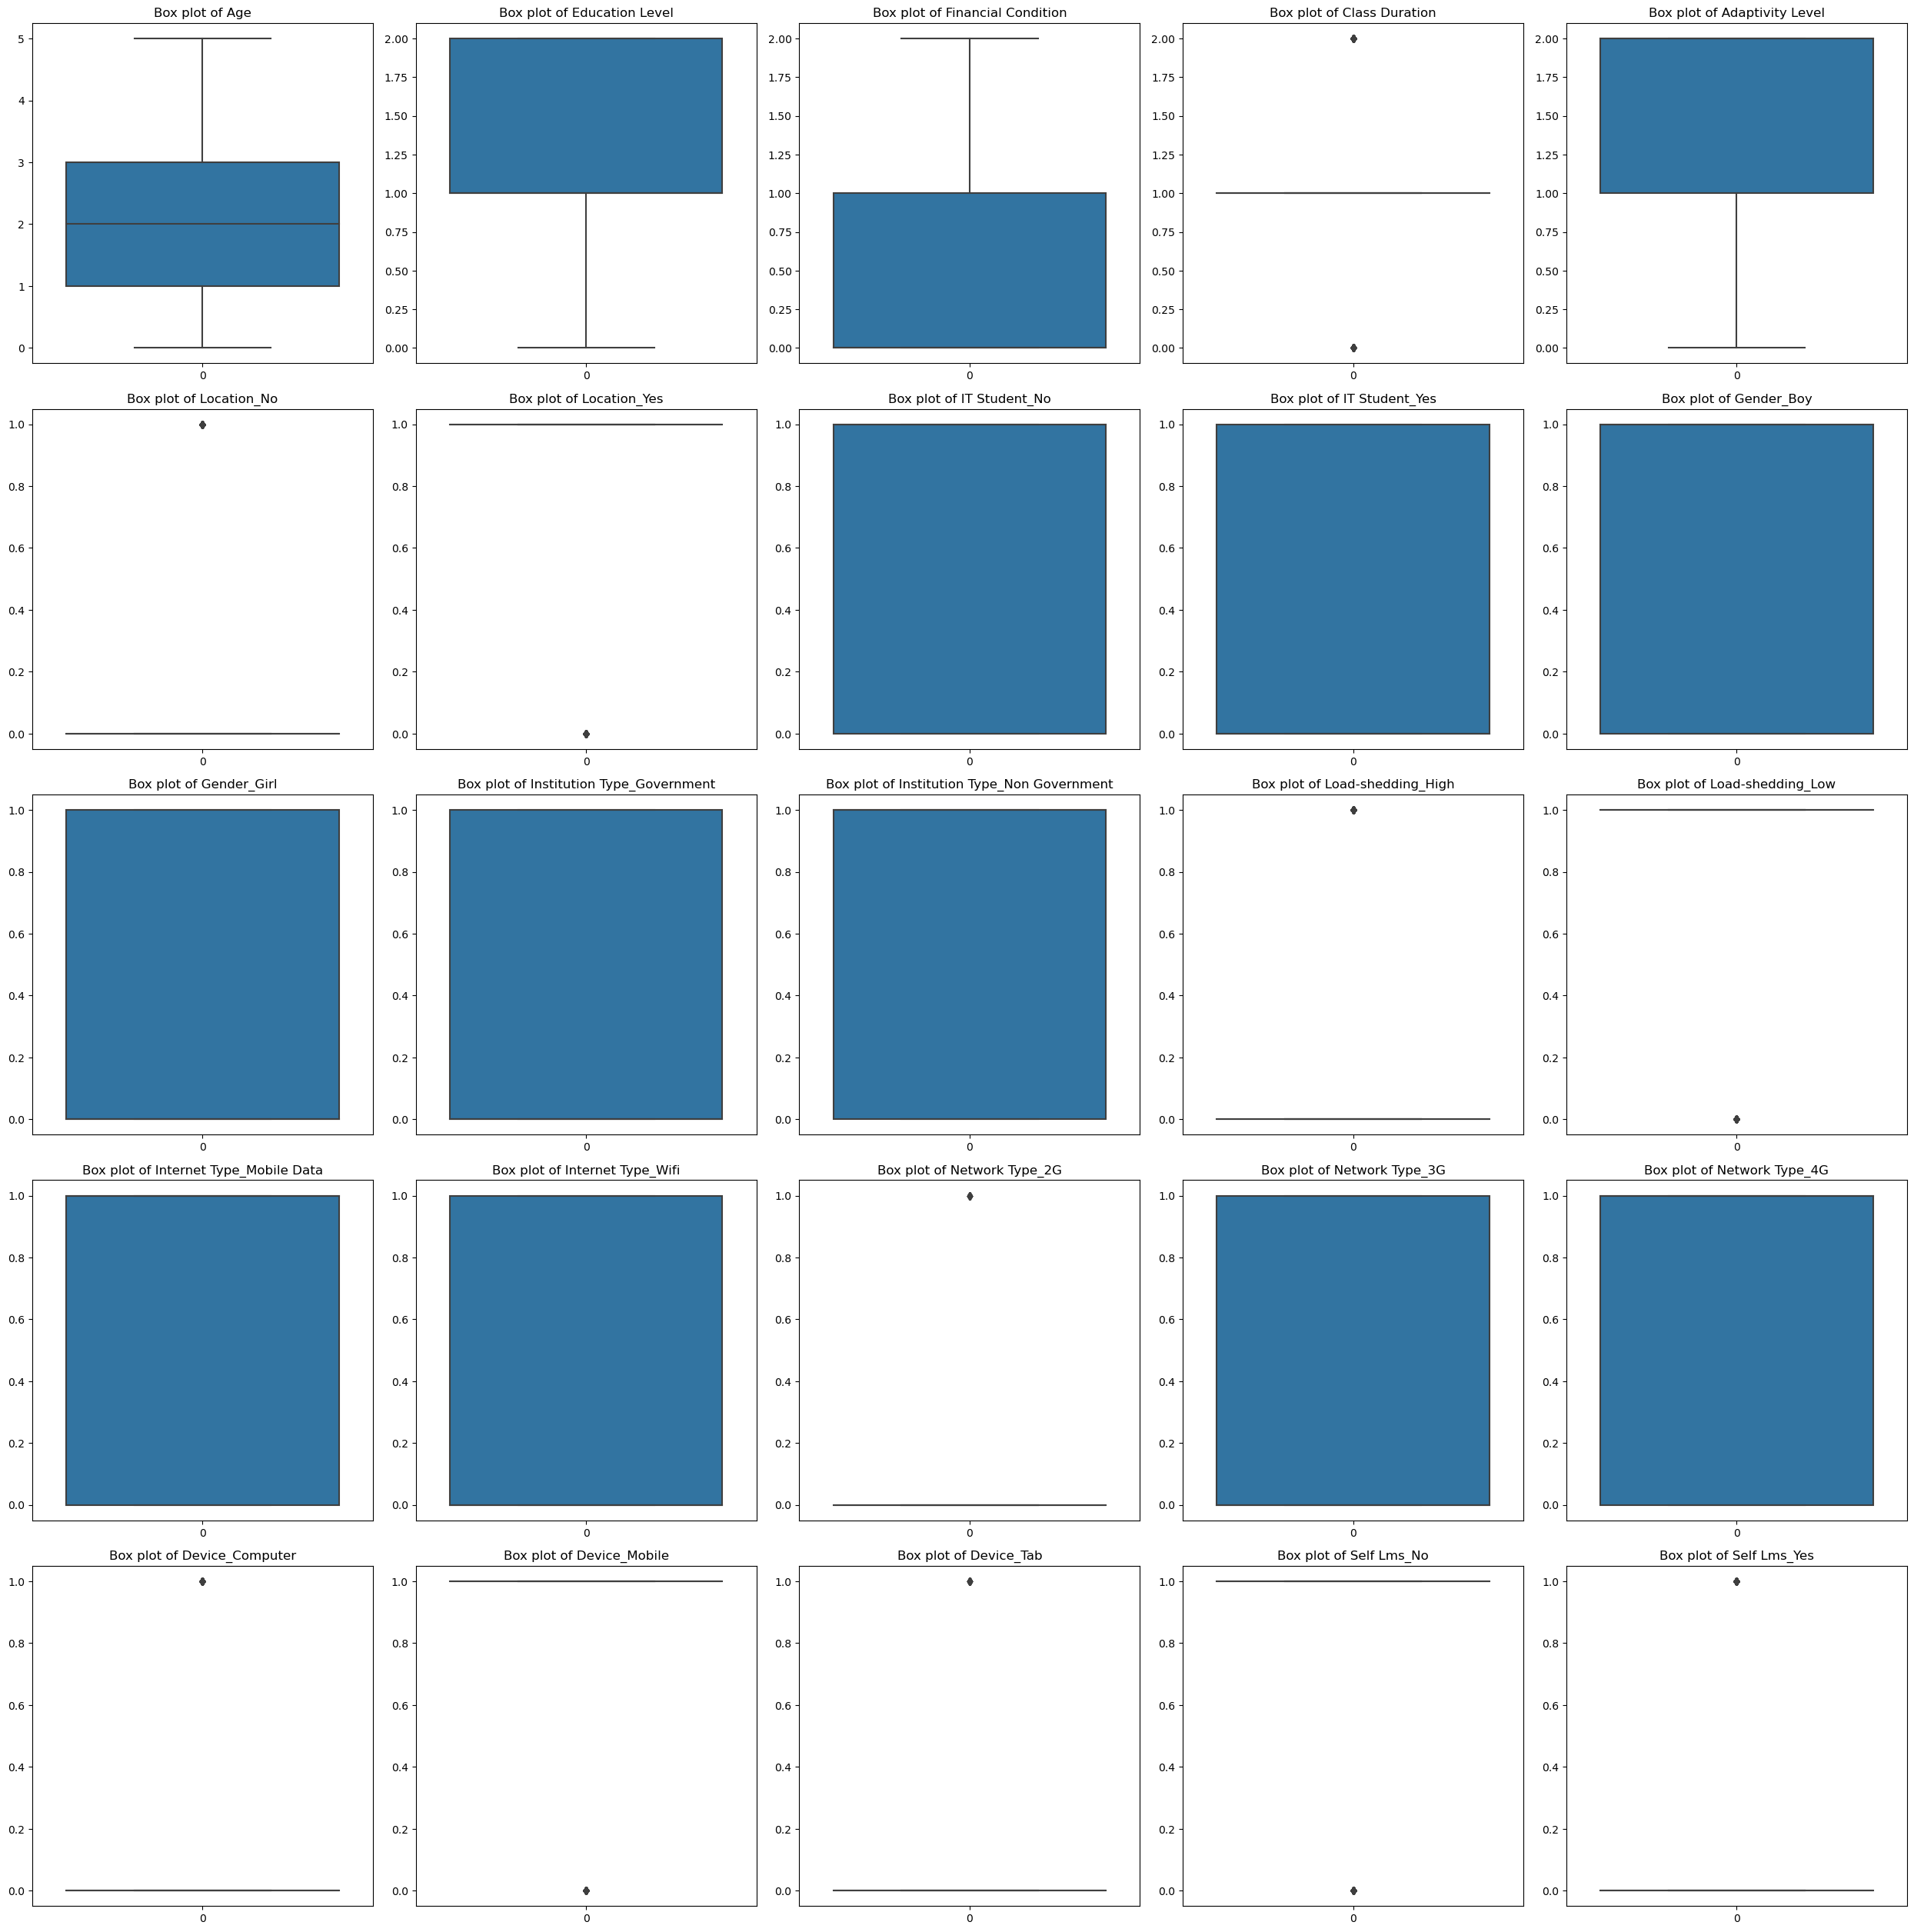

In [30]:
plt.figure(figsize=(25, 30))

# Iterate through each column and plot on a separate subplot
for i, column in enumerate(df_encoded.columns):
    plt.subplot(6, 5, i+1)
    sns.boxplot(df_encoded[column])
    plt.title(f'Box plot of {column}')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [31]:
df_encoded.columns.to_list()

['Age',
 'Education Level',
 'Financial Condition',
 'Class Duration',
 'Adaptivity Level',
 'Location_No',
 'Location_Yes',
 'IT Student_No',
 'IT Student_Yes',
 'Gender_Boy',
 'Gender_Girl',
 'Institution Type_Government',
 'Institution Type_Non Government',
 'Load-shedding_High',
 'Load-shedding_Low',
 'Internet Type_Mobile Data',
 'Internet Type_Wifi',
 'Network Type_2G',
 'Network Type_3G',
 'Network Type_4G',
 'Device_Computer',
 'Device_Mobile',
 'Device_Tab',
 'Self Lms_No',
 'Self Lms_Yes']

# Machine Learning Algorithms

**KNN and Decision tree** 

### Define X and Y

In [32]:
# Feature matrix
X = df_encoded.drop('Adaptivity Level', axis=1)

# target vector
y = df_encoded['Adaptivity Level']

In [33]:
X

Age  Education Level  Financial Condition  Class Duration  Location_No  \
0       3                2                    0               2            0   
1       3                2                    0               1            0   
2       2                0                    0               1            0   
3       1                1                    0               1            0   
4       2                1                    1               0            0   
...   ...              ...                  ...             ...          ...   
1200    2                0                    0               1            0   
1201    2                0                    0               2            1   
1202    1                1                    0               1            0   
1203    2                0                    0               1            1   
1204    1                1                    1               1            0   

      Location_Yes  IT Student_No  IT Student_Yes  Gender_Boy  Gender_Girl  \
0                1              1               0           1            0   
1                1              1               0           0            1   
2                1              1               0           0            1   
3                1              1               0           0            1   
4                1              1               0           0            1   
...            ...            ...             ...         ...          ...   
1200             1              1               0           0            1   
1201             0              1               0           0            1   
1202             1              1               0           1            0   
1203             0              1               0           0            1   
1204             1              1               0           0            1   

      ...  Internet Type_Mobile Data  Internet Type_Wifi  Network Type_2G  \
0     ...                          0                   1                0   
1     ...                          1                   0                0   
2     ...                          0                   1                0   
3     ...                          1                   0                0   
4     ...                          1                   0                0   
...   ...                        ...                 ...              ...   
1200  ...                          0                   1                0   
1201  ...                          0                   1                0   
1202  ...                          1                   0                0   
1203  ...                          0                   1                0   
1204  ...                          1                   0                0   

      Network Type_3G  Network Type_4G  Device_Computer  Device_Mobile  \
0                   0                1                0              0   
1                   0                1                0              1   
2                   0                1                0              1   
3                   0                1                0              1   
4                   1                0                0              1   
...               ...              ...              ...            ...   
1200                0                1                0              1   
1201                0                1                0              1   
1202                1                0                0              1   
1203                0                1                0              1   
1204                1                0                0              1   

      Device_Tab  Self Lms_No  Self Lms_Yes  
0              1            1             0  
1              0            0             1  
2              0            1             0  
3              0            1             0  
4              0            1             0  
...          ...  

In [34]:
y

0       2
1       2
2       2
3       2
4       1
       ..
1200    1
1201    2
1202    2
1203    1
1204    2
Name: Adaptivity Level, Length: 1205, dtype: int32

## Feature Scaling

### Normalization
Normalizing all the features columns

In [35]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler



In [36]:
# Extract features (all columns except the target column)
features = df_encoded.drop(columns=['Adaptivity Level'])

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to the features and transform them in one step
normalized_features = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)

# Concatenate the normalized features with the target column
df_normalized = pd.concat([normalized_features, df_encoded['Adaptivity Level']], axis=1)

# Now df_normalized contains all columns of df_encoded (except the target column) normalized


In [37]:
df_normalized.head()

Age  Education Level  Financial Condition  Class Duration  Location_No  \
0  0.6              1.0                  0.0             1.0          0.0   
1  0.6              1.0                  0.0             0.5          0.0   
2  0.4              0.0                  0.0             0.5          0.0   
3  0.2              0.5                  0.0             0.5          0.0   
4  0.4              0.5                  0.5             0.0          0.0   

   Location_Yes  IT Student_No  IT Student_Yes  Gender_Boy  Gender_Girl  ...  \
0           1.0            1.0             0.0         1.0          0.0  ...   
1           1.0            1.0             0.0         0.0          1.0  ...   
2           1.0            1.0             0.0         0.0          1.0  ...   
3           1.0            1.0             0.0         0.0          1.0  ...   
4           1.0            1.0             0.0         0.0          1.0  ...   

   Internet Type_Wifi  Network Type_2G  Network Type_3G  Network Type_4G  \
0                 1.0              0.0              0.0              1.0   
1                 0.0              0.0              0.0              1.0   
2                 1.0              0.0              0.0              1.0   
3                 0.0              0.0              0.0              1.0   
4                 0.0              0.0              1.0              0.0   

   Device_Computer  Device_Mobile  Device_Tab  Self Lms_No  Self Lms_Yes  \
0              0.0            0.0         1.0          1.0           0.0   
1              0.0            1.0         0.0          0.0           1.0   
2              0.0            1.0         0.0          1.0           0.0   
3              0.0            1.0         0.0          1.0           0.0   
4              0.0            1.0         0.0          1.0           0.0   

   Adaptivity Level  
0                 2  
1                 2  
2                 2  
3                 2  
4                 1  

[5 rows x 25 columns]

In [41]:
df_normalized["Age"].mean()

0.4245643153526972

In [42]:
df_normalized["Education Level"].mean()

0.5983402489626556

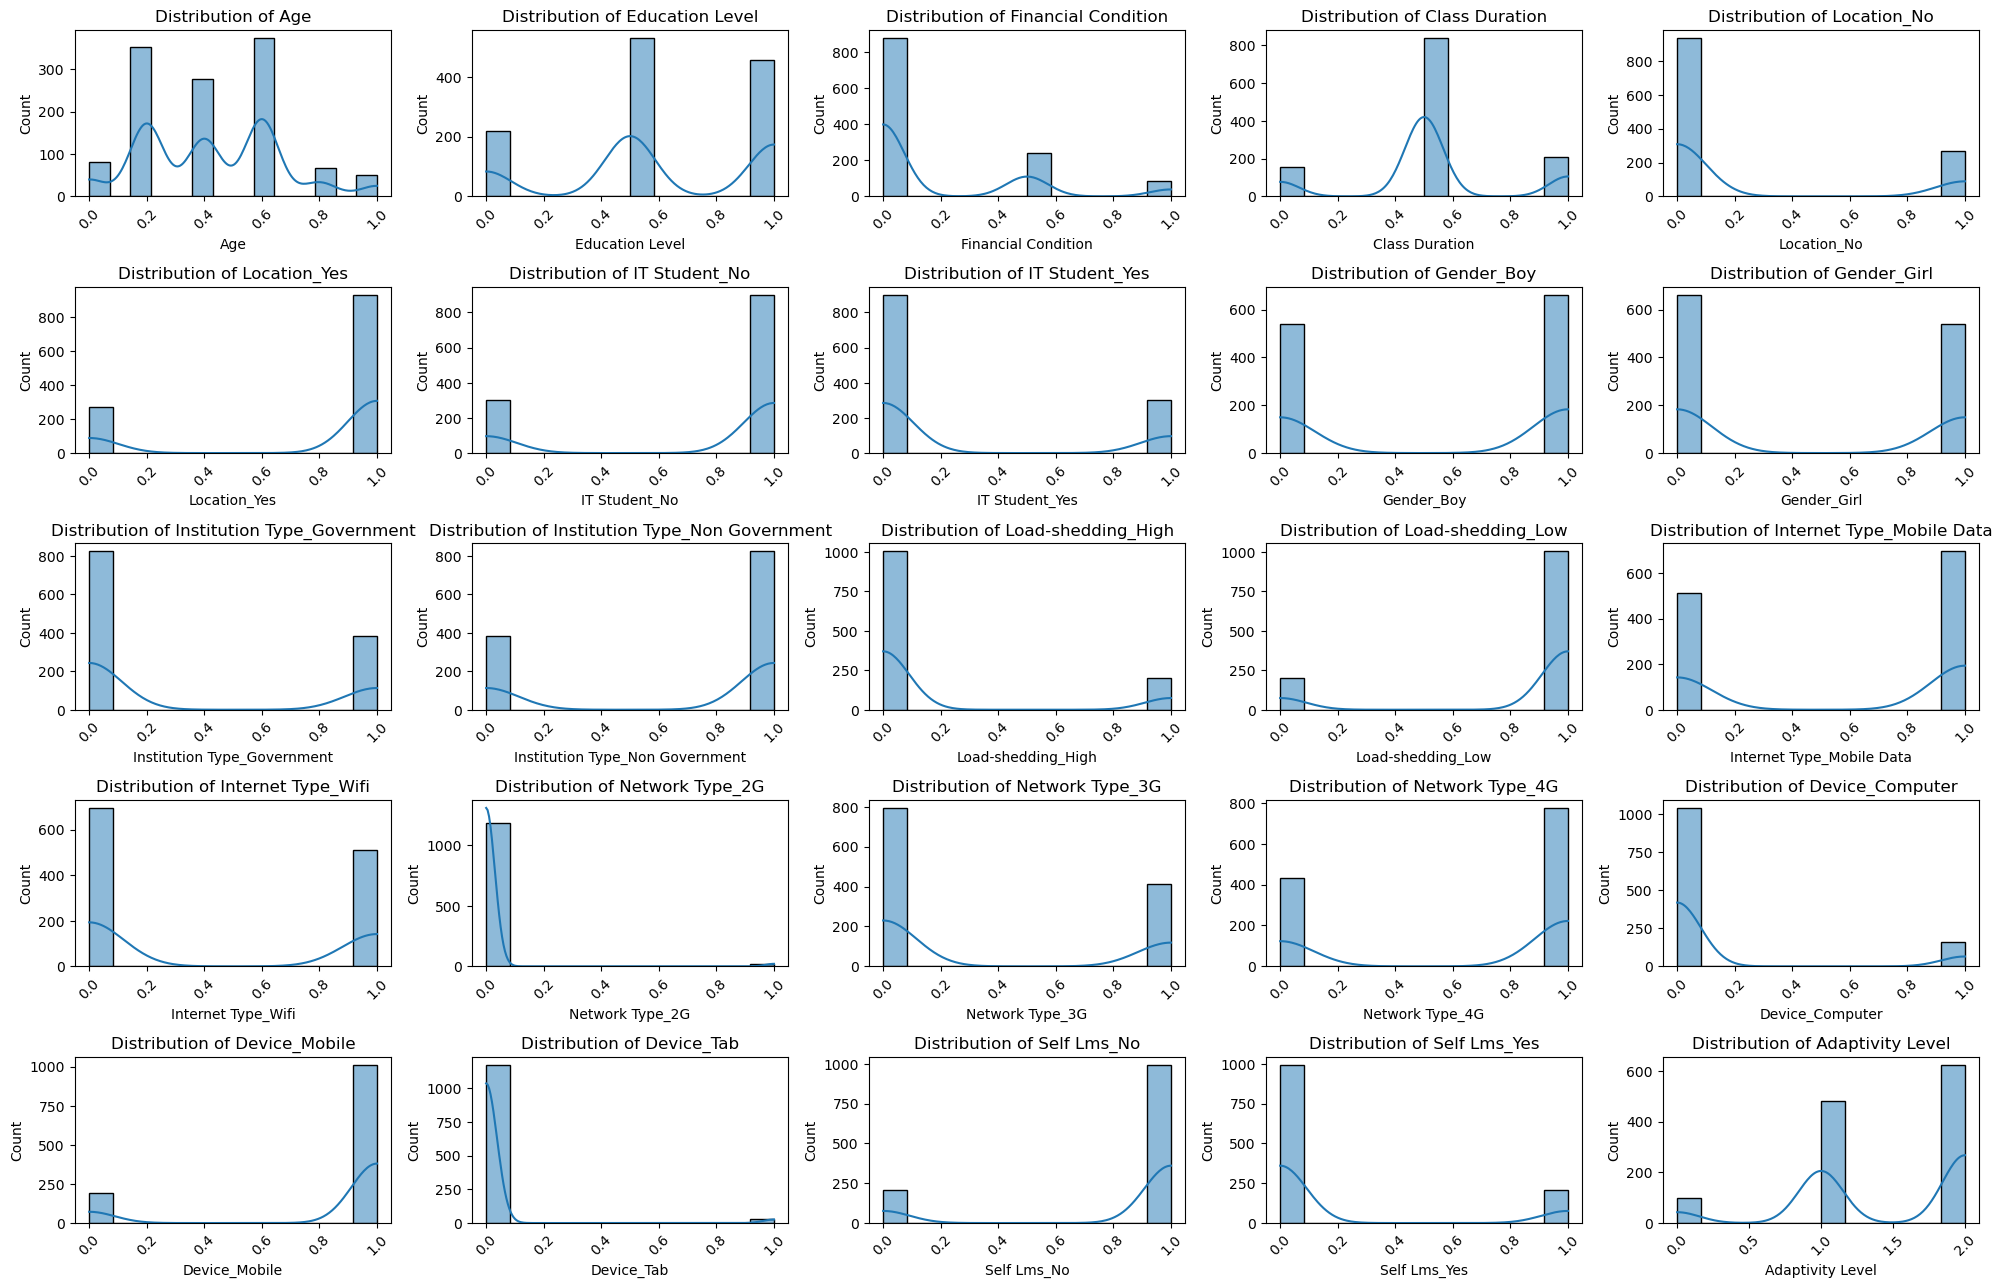

In [43]:
plt.figure(figsize=(20, 15))

# Iterate through each column and plot on a separate subplot
for i, column in enumerate(df_normalized.columns):
    plt.subplot(6, 5, i+1)
    sns.histplot(df_normalized[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

### Train Test Split

In [44]:
# Feature matrix
X = df_normalized.drop('Adaptivity Level', axis=1)

# target vector
y = df_normalized['Adaptivity Level']

In [45]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# KNN

In [46]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [47]:
pred = knn.predict(X_test)

In [48]:
pred

array([1, 2, 2, 1, 2, 0, 1, 1, 2, 1, 0, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2,
       1, 1, 2, 2, 2, 0, 1, 1, 1, 2, 2, 0, 2, 1, 1, 1, 2, 1, 2, 0, 1, 2,
       2, 2, 2, 1, 0, 1, 2, 0, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1,
       1, 2, 1, 1, 2, 1, 2, 0, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2,
       1, 2, 1, 1, 2, 1, 0, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 0, 1, 1,
       2, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1,
       2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 0, 1, 2, 1,
       1, 1, 2, 2, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 2, 1, 1, 2,
       1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2,
       2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 1,
       2, 2, 2, 2, 0, 2, 0, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 2, 2])

In [49]:
#Training Accuracy
print(knn.score(X_train, y_train))

0.91701244813278


In [50]:
from sklearn.metrics import classification_report,confusion_matrix

In [51]:
#Testing Accuracy
print(knn.score(X_test, y_test))

0.8838174273858921


**Confusion Matrix**

In [52]:
print(confusion_matrix(y_test,pred))

[[ 14   4   5]
 [  0  97   6]
 [  1  12 102]]


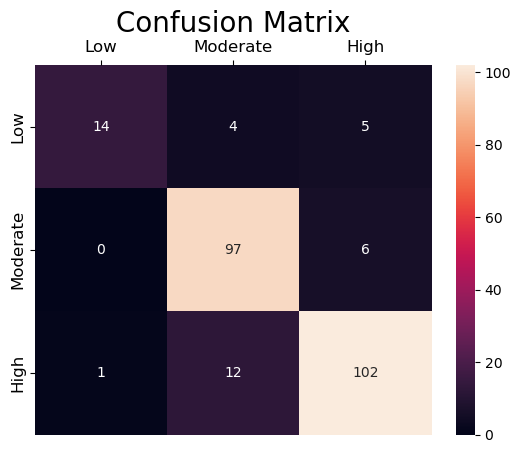

In [53]:
# Create a subplot
ax = plt.subplot()

# Create a heatmap of the confusion matrix
sns.heatmap(confusion_matrix(y_test, pred), annot=True, ax=ax, fmt='g')

# Set the title of the plot
ax.set_title('Confusion Matrix', fontsize=20)

# Set tick labels for x-axis (predicted labels)
ax.xaxis.set_ticklabels(['Low', 'Moderate', 'High'], fontsize=12)
ax.xaxis.tick_top()

# Set tick labels for y-axis (true labels)
ax.yaxis.set_ticklabels(['Low', 'Moderate', 'High'], fontsize=12)

# Show the plot
plt.show()


In [54]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.93      0.61      0.74        23
           1       0.86      0.94      0.90       103
           2       0.90      0.89      0.89       115

    accuracy                           0.88       241
   macro avg       0.90      0.81      0.84       241
weighted avg       0.89      0.88      0.88       241



## Check different distance metric

#### Euclidean
#### Manhattan
#### Chebyshev
#### Minkowski

In [55]:
# Importing the required libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# List of distance metrics to try
distance_metrics = ['euclidean', 'manhattan', 'chebyshev', 'minkowski']

# Loop through each distance metric and train the KNN classifier
for metric in distance_metrics:
    # Initialize the KNN classifier with the current metric
    knn = KNeighborsClassifier(n_neighbors=1, metric=metric)
    
    # Train the classifier
    knn.fit(X_train, y_train)
    
    # Make predictions
    pred = knn.predict(X_test)
    
    # Print confusion matrix and classification report
    print(f"Distance Metric: {metric}")
    print(confusion_matrix(y_test, pred))
    print(classification_report(y_test, pred))
    print("Training Accuracy:", knn.score(X_train, y_train))
    print("Testing Accuracy:", knn.score(X_test, y_test))
    print()


Distance Metric: euclidean
[[ 14   4   5]
 [  0  97   6]
 [  1  12 102]]
              precision    recall  f1-score   support

           0       0.93      0.61      0.74        23
           1       0.86      0.94      0.90       103
           2       0.90      0.89      0.89       115

    accuracy                           0.88       241
   macro avg       0.90      0.81      0.84       241
weighted avg       0.89      0.88      0.88       241

Training Accuracy: 0.91701244813278
Testing Accuracy: 0.8838174273858921

Distance Metric: manhattan
[[ 14   4   5]
 [  0  97   6]
 [  1  12 102]]
              precision    recall  f1-score   support

           0       0.93      0.61      0.74        23
           1       0.86      0.94      0.90       103
           2       0.90      0.89      0.89       115

    accuracy                           0.88       241
   macro avg       0.90      0.81      0.84       241
weighted avg       0.89      0.88      0.88       241

Training Accuracy:

Minimum error: 0.11618257261410789 at K = 0


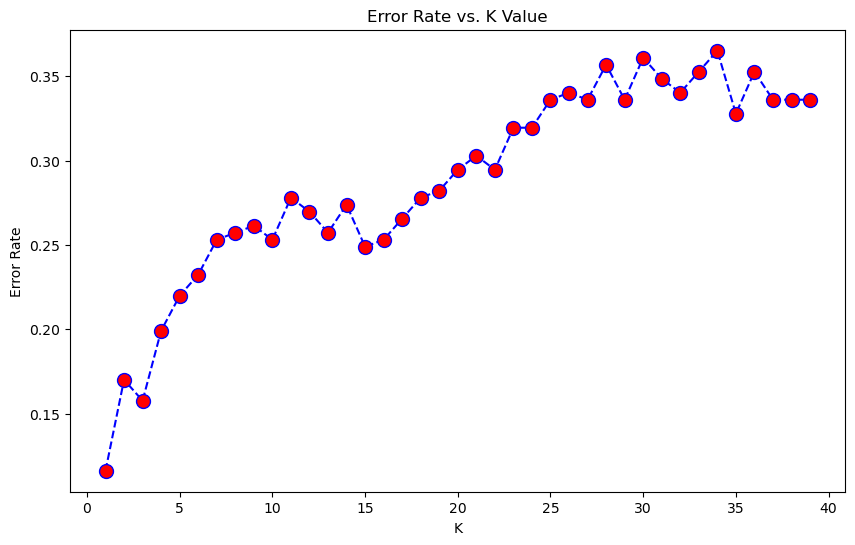

In [56]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Maximum accuracy: 0.8838174273858921 at K = 0


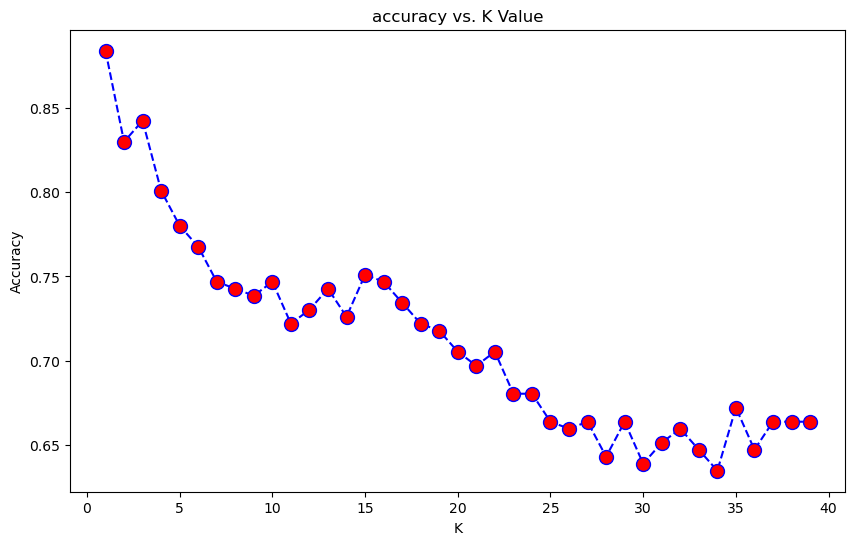

In [57]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed',
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:",max(acc),"at K =",acc.index(max(acc)))

In [58]:
knn = KNeighborsClassifier(n_neighbors=2)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print(classification_report(y_test,pred))


              precision    recall  f1-score   support

           0       0.75      0.65      0.70        23
           1       0.78      0.92      0.84       103
           2       0.91      0.78      0.84       115

    accuracy                           0.83       241
   macro avg       0.81      0.79      0.79       241
weighted avg       0.84      0.83      0.83       241



# 2. Decision Tree


In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


In [60]:
# Initializing and training the Decision Tree Classifier with Gini impurity
dt_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
dt_gini.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

**Use Gini Index**

In [61]:
# Making predictions and evaluating the models
y_pred_gini = dt_gini.predict(X_test)

accuracy_gini = accuracy_score(y_test, y_pred_gini)

accuracy_gini

0.8921161825726142

In [62]:
# Calculate accuracy and generate classification report
accuracy_gini = accuracy_score(y_test, y_pred_gini)
dt_gini_classification_rep = classification_report(y_test, y_pred_gini)

In [63]:
print(dt_gini_classification_rep)

              precision    recall  f1-score   support

           0       0.83      0.65      0.73        23
           1       0.93      0.90      0.92       103
           2       0.87      0.93      0.90       115

    accuracy                           0.89       241
   macro avg       0.88      0.83      0.85       241
weighted avg       0.89      0.89      0.89       241



**Using Entropy**

In [64]:
# Initializing and training the Decision Tree Classifier with Information Gain (Entropy)
dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [65]:
# Making predictions and evaluating the models
y_pred_entropy = dt_entropy.predict(X_test)

accuracy_entropy = accuracy_score(y_test, y_pred_entropy)

accuracy_entropy

0.8921161825726142

In [66]:
# generate classification report
dt_entropy_classification_rep = classification_report(y_test, y_pred_entropy)
print(dt_entropy_classification_rep)

              precision    recall  f1-score   support

           0       0.88      0.65      0.75        23
           1       0.92      0.90      0.91       103
           2       0.87      0.93      0.90       115

    accuracy                           0.89       241
   macro avg       0.89      0.83      0.85       241
weighted avg       0.89      0.89      0.89       241



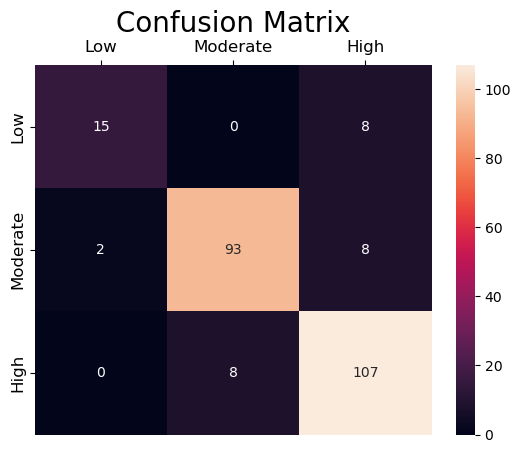

In [67]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_pred_entropy), annot=True, ax = ax, fmt = 'g'); 
ax.set_title('Confusion Matrix', fontsize=20)

ax.xaxis.set_ticklabels(['Low', 'Moderate','High'], fontsize = 12)
ax.xaxis.tick_top()

ax.yaxis.set_ticklabels(['Low', 'Moderate','High'], fontsize = 12)
plt.show()

In [68]:
# Assuming you have the confusion matrix, classification report, and ROC AUC scores
# for both Gini and Entropy models

# Accuracy Comparison
accuracy_gini = accuracy_score(y_test, y_pred_gini)
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
confusion_entropy = confusion_matrix(y_test, y_pred_entropy)
confusion_gini = confusion_matrix(y_test, y_pred_gini)

print("Accuracy Comparison:")
print("Gini Model Accuracy: {:.2f}".format(accuracy_gini))
print("Entropy Model Accuracy: {:.2f}".format(accuracy_entropy))

# Confusion Matrix Comparison
print("\nConfusion Matrix Comparison:")
print("Gini Model Confusion Matrix:\n", confusion_gini)
print("\nEntropy Model Confusion Matrix:\n", confusion_entropy)

# Classification Report Comparison
print("\nClassification Report Comparison:")
print("Gini Model Classification Report:\n", dt_gini_classification_rep)
print("\nEntropy Model Classification Report:\n", dt_entropy_classification_rep)

Accuracy Comparison:
Gini Model Accuracy: 0.89
Entropy Model Accuracy: 0.89

Confusion Matrix Comparison:
Gini Model Confusion Matrix:
 [[ 15   0   8]
 [  2  93   8]
 [  1   7 107]]

Entropy Model Confusion Matrix:
 [[ 15   0   8]
 [  2  93   8]
 [  0   8 107]]

Classification Report Comparison:
Gini Model Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.65      0.73        23
           1       0.93      0.90      0.92       103
           2       0.87      0.93      0.90       115

    accuracy                           0.89       241
   macro avg       0.88      0.83      0.85       241
weighted avg       0.89      0.89      0.89       241


Entropy Model Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.65      0.75        23
           1       0.92      0.90      0.91       103
           2       0.87      0.93      0.90       115

    accuracy                  

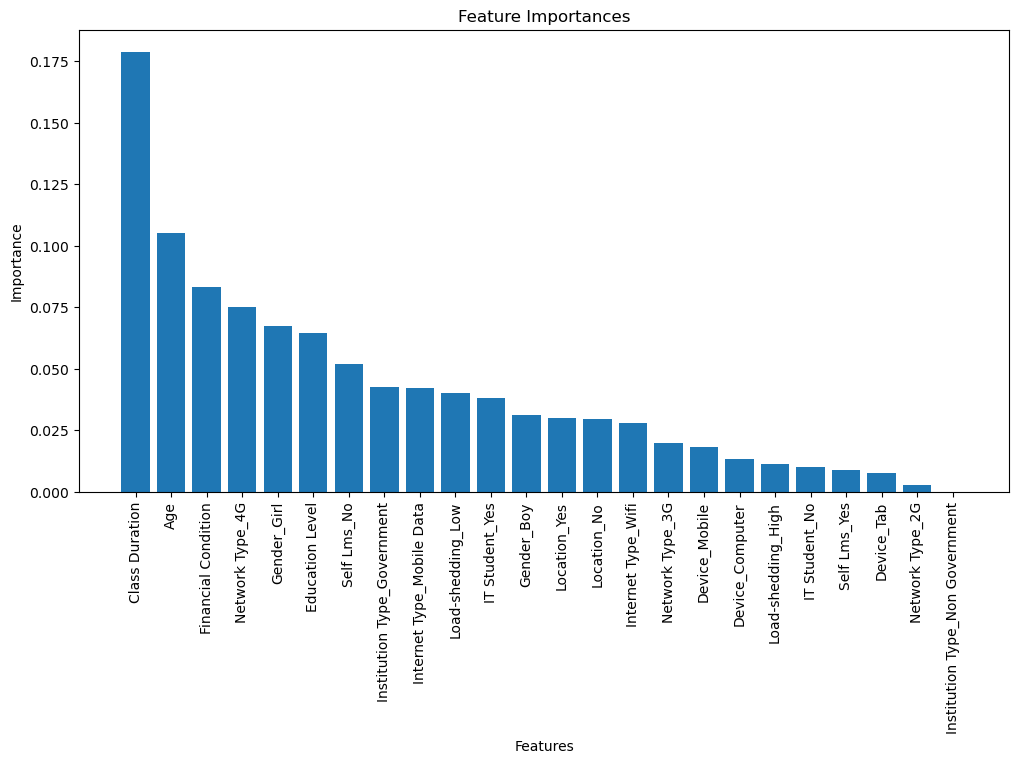

In [69]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have a dataset 'df_encoded' and target variable 'y'

# Train a Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X, y)

# Get Feature Importances
importances = dt_model.feature_importances_

# Convert to a DataFrame
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importances})

# Sort the DataFrame by importance
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

# Visualize Feature Importances
plt.figure(figsize=(12, 6))
plt.bar(feature_importances['feature'], feature_importances['importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.title('Feature Importances')
plt.show()


## Thank You!
